[View in Colaboratory](https://colab.research.google.com/github/sabipeople/mnist_segmentation/blob/master/fc9_seg.ipynb)

w: [[[[-0.7137608528137207, -0.005020142532885075, 0.10499553382396698, -0.090891994535923, -0.47319164872169495, -0.14844529330730438, 0.9204310178756714, -0.4141968786716461, 0.4769264757633209, -0.29033517837524414, -0.5671805739402771], [0.34173640608787537, 0.2267114371061325, 0.7011045217514038, -0.22097857296466827, 0.17321231961250305, 0.9561489224433899, 0.31188949942588806, -0.4084809422492981, 0.2334672212600708, 0.24991381168365479, 0.32363349199295044], [-0.3864283561706543, 0.4877476394176483, -0.6706507205963135, 0.303906112909317, -0.180598184466362, 0.15003858506679535, -0.8819684982299805, 0.16260458528995514, 0.4376281797885895, 0.6182018518447876, -0.023024199530482292], [0.14751079678535461, -0.029759816825389862, 0.030166970565915108, -0.12106142193078995, -0.48341020941734314, -0.08896847069263458, 0.28453192114830017, 0.10858256369829178, 0.10733655840158463, 0.7631980180740356, -0.25743338465690613], [0.6920726299285889, 0.047717418521642685, 0.4429934918880462

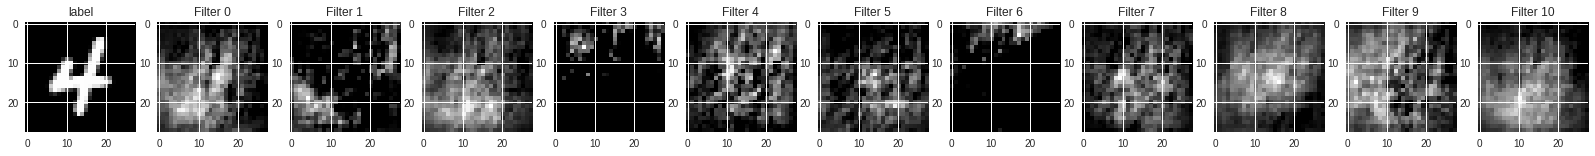

conv9:


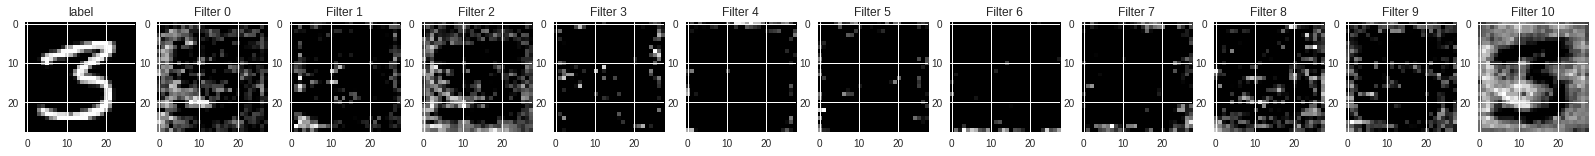

conv9:


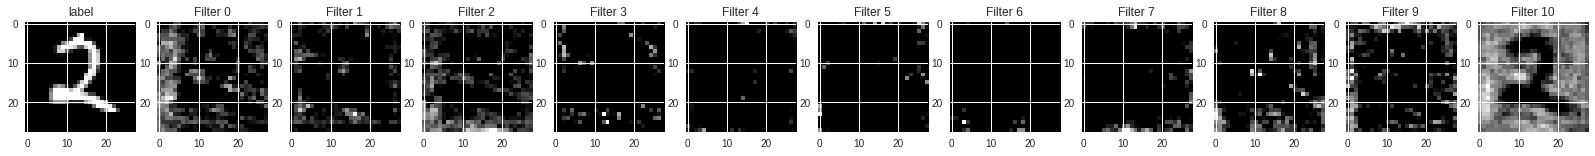

conv9:


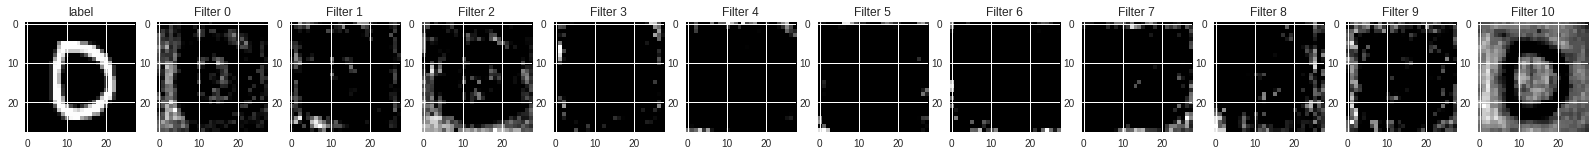

conv9:


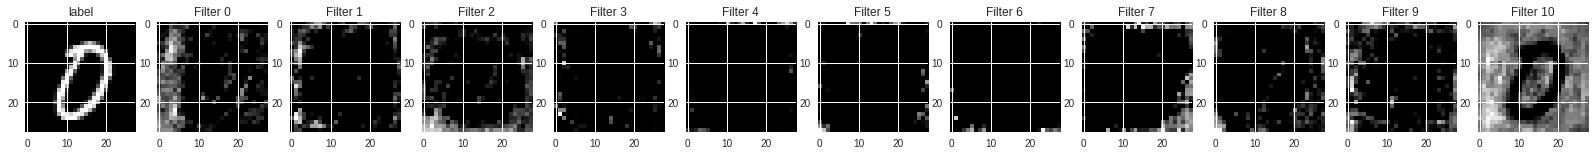

conv9:


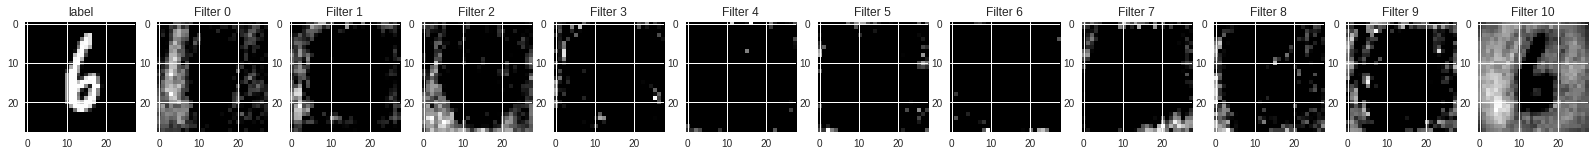

conv9:


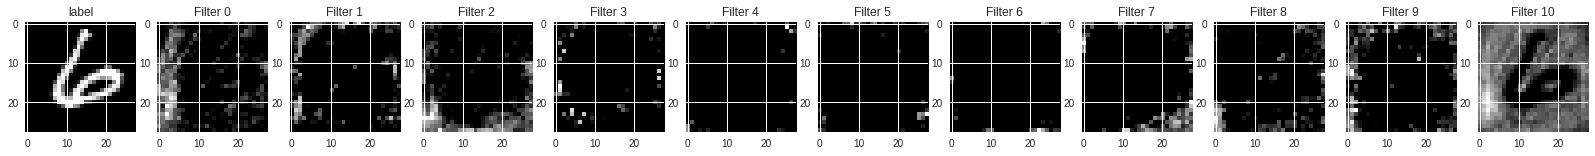

conv9:


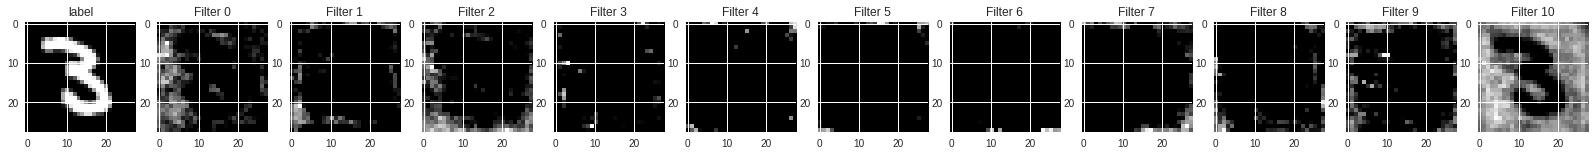

conv9:


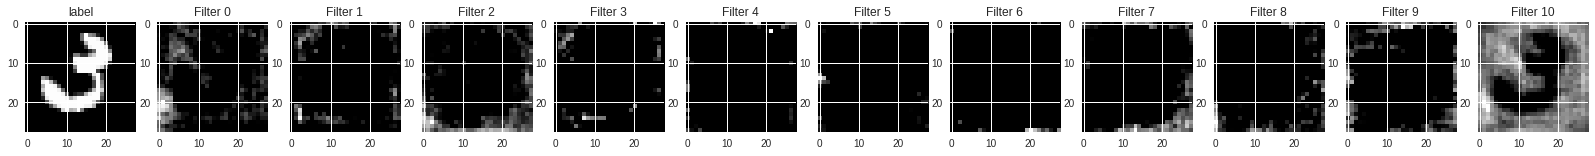

conv9:


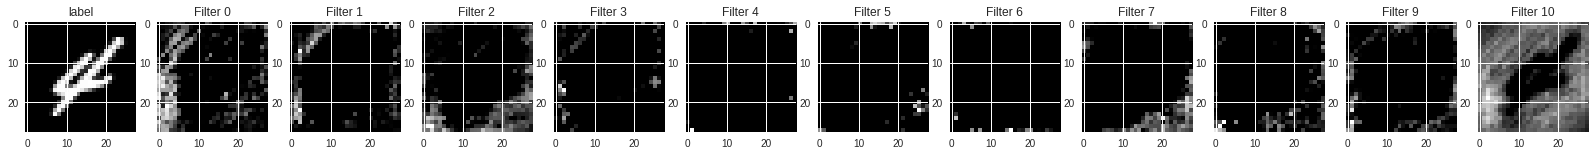

loss: 2972.814713075757


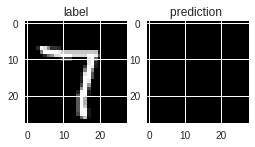

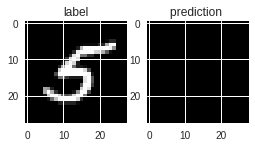

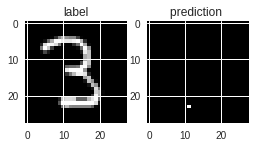

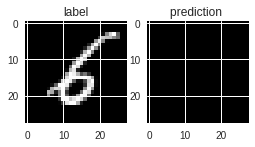

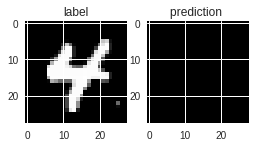

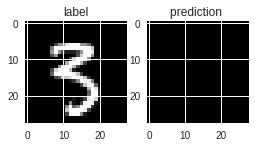

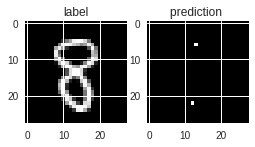

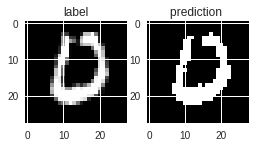

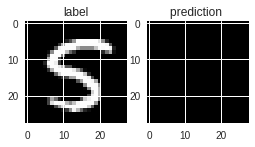

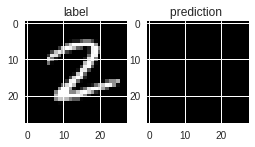

accuracy:  0.0
conv9:


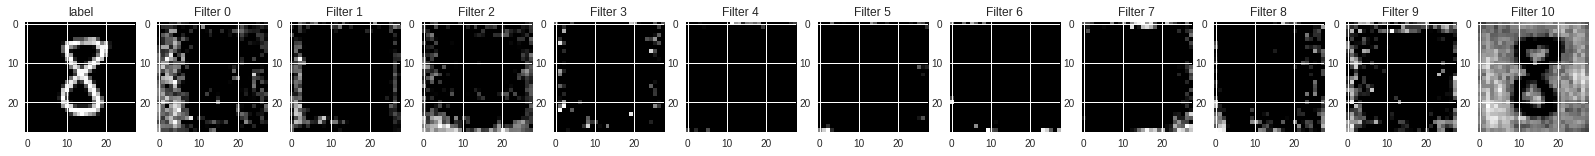

conv9:


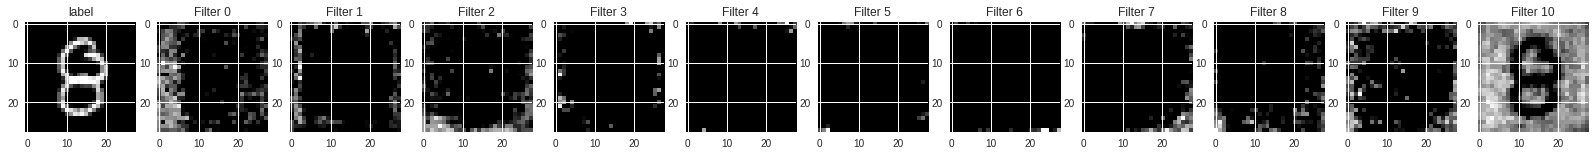

conv9:


/usr/local/lib/python3.6/dist-packages/matplotlib/axis.py:1032: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


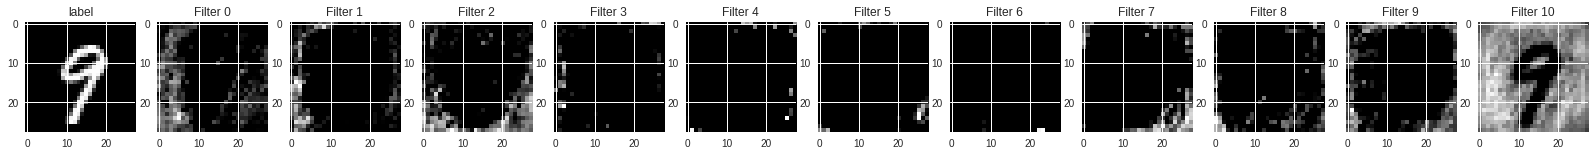

KeyboardInterrupt: ignored

In [1]:
import tensorflow as tf
import math
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pdb
import pprint
def makeLabels(img,label):
  w,h=img.shape
  annotation = np.zeros(shape=(h,w,11))
  gt_chenel=annotation[:,:,label]
  gt_chenel[img>50]=1
  gt_chenel=annotation[:,:,10]
  gt_chenel[img<=50]=1
  return annotation.astype(np.float32)

def getAnnotationImg(img,label):
  bg=10
  annotation=img.copy()
  annotation[annotation<=50]=bg
  annotation[annotation>50]=label
  return annotation

def getActivations(layer,stimuli):
  units = layer.eval(feed_dict={xin:stimuli})#sess.run(layer,feed_dict={xin:stimuli})
  plotNNFilter(stimuli,units)
  
def plotNNFilter(img,units):
  filters = units.shape[3]
  plt.figure(1, figsize=(28,28))
  plt.grid(False)
  #plt.figure(1)
  n_columns = 12
  n_rows = math.ceil(filters / n_columns) + 1
  plt.subplot(n_rows, n_columns, 1)
  plt.title('label')
  plt.imshow(img, interpolation="nearest", cmap="gray")
  for i in range(filters):
    plt.subplot(n_rows, n_columns, i+2)
    plt.title('Filter ' + str(i))
    plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")
  plt.show()
def visualizeFilters(filters):
  t_filters=filters.transpose(3,2,0,1)
  t_filters=t_filters.reshape(-1,13,13)
  numFilters=t_filters.shape[0]
  cols=10
  rows=100/cols
  flg=plt.figure(1)
  flg.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05,wspace=0.05)
  for i in range(100):
    ax=flg.add_subplot(rows,cols, i+1, xticks=[], yticks=[])
    ax.imshow(t_filters[i,:,:], cmap="gray", interpolation="nearest")
  plt.show()
  
  
  
  
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test, y_test) = mnist.load_data()
he_init=tf.contrib.layers.variance_scaling_initializer(mode='FAN_OUT')
ksize=7
xin=tf.placeholder(tf.float32, shape=(28,28))
inputLayer=tf.reshape(xin,[1,28,28,1])
conv1=tf.layers.conv2d(inputs=inputLayer,filters=32,kernel_size=[ksize,ksize],padding="same", activation=tf.nn.relu,kernel_initializer=he_init,name="layer1")
conv2=tf.layers.conv2d(inputs=conv1,filters=64,kernel_size=[ksize,ksize], padding="same", activation=tf.nn.relu,kernel_initializer=he_init,name="layer2")
conv3=tf.layers.conv2d(inputs=conv2,filters=64,kernel_size=[ksize,ksize], padding="same", activation=tf.nn.relu,kernel_initializer=he_init,name="layer3")
conv4=tf.layers.conv2d(inputs=conv3,filters=64,kernel_size=[ksize,ksize], padding="same", activation=tf.nn.relu,kernel_initializer=he_init,name="layer4")
conv5=tf.layers.conv2d(inputs=conv4,filters=64,kernel_size=[ksize,ksize], padding="same", activation=tf.nn.relu,kernel_initializer=he_init,name="layer5")
conv6=tf.layers.conv2d(inputs=conv5,filters=64,kernel_size=[ksize,ksize], padding="same", activation=tf.nn.relu,kernel_initializer=he_init,name="layer6")
conv7=tf.layers.conv2d(inputs=conv6,filters=64,kernel_size=[ksize,ksize], padding="same", activation=tf.nn.relu,kernel_initializer=he_init,name="layer7")
#conv8=tf.layers.conv2d(inputs=conv7,filters=256,kernel_size=[3,3], padding="same", activation=tf.nn.relu,name="layer8")
conv9=tf.layers.conv2d(inputs=conv7,filters=11,kernel_size=[1,1], padding="same", activation=tf.nn.relu,kernel_initializer=he_init,name="layer9")
#loss function
prob_2d=tf.reshape(conv9,[-1,11])
yin=tf.placeholder(tf.float32, shape=(28,28,11))
ylabels=tf.reshape(yin,[-1,11])
loss_mat=tf.nn.softmax_cross_entropy_with_logits_v2(labels=ylabels,logits=prob_2d, name="softmax_cross_entropy")
loss=tf.reduce_mean(loss_mat,name="reduce_mean")


#loss의 형태를 확인할 필요가 있음, 28,28 이면 reduce_sum 이용할것
#optimization
adam=False
if adam:
  optimizer = tf.train.AdamOptimizer(0.0001)
else:
  optimizer = tf.train.GradientDescentOptimizer(0.0001)
grad=optimizer.compute_gradients(loss)
mini=optimizer.apply_gradients(grad)

#this is for prediction not for train
pred_prob=tf.nn.softmax(conv9,axis=3)
pred_cls=tf.argmax(pred_prob,axis=3)
pred=tf.squeeze(pred_cls)
pred_s32=tf.cast(pred, tf.int32)
#this is for accuracy check
ytest_gt=tf.placeholder(tf.int32,shape=(28,28))
casted_acc=tf.to_float(tf.equal(pred_s32, ytest_gt))
accuracy=tf.reduce_mean(casted_acc)
debug =False

with tf.Session() as sess:
  maxNum=x_train.shape[0]
  sess.run(tf.global_variables_initializer())
  for i in range(100):
    acc_loss=0
    if i==0:
      a=tf.contrib.framework.get_trainable_variables()
      for index,var in enumerate(a):
        if var.name == 'layer9/kernel:0':
          w=a[index].eval()
          b=a[index+1].eval()
          print("w:",w.tolist())
          print("b:",b.tolist())
          break
      
    for _ in range(int(x_train.shape[0]/10)):
      idx=np.random.randint(maxNum)
      annotation=makeLabels(x_train[idx],y_train[idx])
      if debug:
        if _ % 300==0:
          a=tf.global_variables()#tf.contrib.framework.get_trainable_variables()
          for index,var in enumerate(a):
            if var.name == 'layer9/kernel:0':
              w=a[index].eval()
              b=a[index+1].eval()
              print("w:",w.tolist())
              print("b:",b.tolist())
              break
          print("conv9:")
          getActivations(conv9,x_train[idx])
      
        for index,tu in enumerate(grad):
          if tu[0].name=='gradients/layer9/Conv2D_grad/tuple/control_dependency_1:0':
            #weight gradient
            weight_grad=tu[0].eval(feed_dict={xin:x_train[idx], yin:annotation})[0,0,:,0]
            weight_var=tu[1].eval()[0,0,:,0]
            print("gradient:", weight_grad)
            print("weight:", weight_var)
            #bias gradient
            bias_grad=grad[index+1][0].eval(feed_dict={xin:x_train[idx], yin:annotation})
            bias_var=grad[index+1][1].eval()
            print("bias gradient:",bias_grad)
            print("bias:",bias_var)
        mini.run(feed_dict={xin:x_train[idx], yin:annotation})
      
        a=tf.global_variables()#tf.contrib.framework.get_trainable_variables()
        for index,var in enumerate(a):
          if var.name == 'layer9/kernel:0':
            w=a[index].eval()
            b=a[index+1].eval()
            print("after op w:",w[0,0,:,0])
            print("after op b:",b.tolist())
            break
      else:
        
        if _ % 600==0:
          '''
          a=tf.global_variables()#tf.contrib.framework.get_trainable_variables()
          
          for index,var in enumerate(a):
            if var.name == 'layer9/kernel:0':
              w=a[index].eval()
              b=a[index+1].eval()
              #visualizeFilters(w)
              print("w:",w.tolist())
              print("b:",b.tolist())
              break
          '''
          print("conv9:")
          getActivations(conv9,x_train[idx])
        
        _,lo=sess.run([mini,loss],feed_dict={xin:x_train[idx], yin:annotation})
        acc_loss +=lo
    print("loss:",acc_loss)
    acc=0
    num_test=x_test.shape[0]
    for j in range(10):
      idx=np.random.randint(num_test)
      #ygt = getAnnotationImg(x_test[idx],y_test[idx])
      pcls=pred_s32.eval(feed_dict={xin:x_test[idx]})
      pcls[pcls==y_test[idx]]=255
      pcls[pcls!=255]=0
      
      plt.figure(1, figsize=(4,4))
      plt.subplot(1,2,1)
      plt.title('label')
      plt.imshow(x_test[idx], interpolation="nearest", cmap="gray")
      plt.subplot(1, 2, 2)
      plt.title('prediction ')
      plt.imshow(pcls, interpolation="nearest", cmap="gray")
      plt.show()
      #acc+=accuracy.eval(feed_dict={xin:x_test[idx], ytest_gt:ygt})
    print("accuracy: ",acc/100)

    